In [ ]:
# !pip install pandas
# !pip install scipy
# !pip install statsmodels
# !pip install matplotlib

#### Процедура Кохрейна-Оркатта

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS

In [ ]:
# from sklearn.linear_model import LinearRegression
# from scipy.stats import linregress

In [ ]:
data = pd.read_excel('данные_к_о.xlsx', header=None)

In [ ]:
model = OLS(data[0], sm.add_constant(data[1]))
results = model.fit()

In [ ]:
results.params

const    2.299319
1       -0.778862
dtype: float64

In [ ]:
y_pred = results.predict(sm.add_constant(data[1]))
residuals = data[0] - y_pred
residuals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0    -0.070536
1    -0.411170
2    -0.419477
3    -0.106477
4    -0.636959
5    -0.137057
6     0.065041
7    -0.021909
8     0.142601
9     0.031264
10    0.120978
11    0.180072
12   -0.004242
13    0.067078
14   -0.134426
15    0.051462
16    0.056474
17   -0.083366
18   -0.062118
19    0.277955
20    0.100117
21    0.572272
22    0.140334
23    0.282090
dtype: float64

In [ ]:
# dl = 1.27
# du = 1.45
# попали в интервал от 0 до dl => есть положительная автокорреляция
DW = durbin_watson(residuals)
DW

1.101759544151374

In [ ]:
# Далее проводится процедура Кохрейна-Оркатта, начиная с 0 итерации

In [ ]:
# вспомогательная регрессия для оценки ро
y = residuals[1:].reset_index(drop=True)
x = residuals[:-1].reset_index(drop=True)
model = OLS(y, x)
results = model.fit()
rho = results.params.values[0]
# преобразование
y_star = [data[0].values[i] - rho*data[0].values[i-1] for i in range(1, data[0].shape[0])]
x_star = [data[1].values[i] - rho*data[1].values[i-1] for i in range(1, data[1].shape[0])]

In [ ]:
# оценка параметров alpha, beta
model = OLS(y_star, sm.add_constant(x_star))
results = model.fit()
alpha, beta = results.params
alpha = alpha/(1 - rho)
alpha, beta

(2.3908956788303826, -0.8293416993792969)

In [ ]:
# новые остатки
y_pred = alpha + beta*data[1]
residuals = data[0] - y_pred
residuals

0    -0.053176
1    -0.423341
2    -0.461482
3    -0.148482
4    -0.680680
5    -0.123230
6     0.083411
7    -0.027063
8     0.104230
9     0.023788
10    0.089826
11    0.174009
12    0.000952
13    0.082015
14   -0.163659
15    0.063572
16    0.043243
17   -0.073578
18   -0.061518
19    0.235395
20    0.116872
21    0.528955
22    0.141288
23    0.240641
dtype: float64

In [ ]:
# оценки на прошлом этапе (для сравнения с заданной точностью eps)
eps = 0.05
old_alpha, old_beta, old_rho = alpha, beta, rho

In [ ]:
# вспомогательная регрессия для оценки ро
y = residuals[1:].reset_index(drop=True)
x = residuals[:-1].reset_index(drop=True)
model = OLS(y, x)
results = model.fit()
rho = results.params.values[0]
# преобразование
y_star = [data[0].values[i] - rho*data[0].values[i-1]
          for i in range(1, data[0].shape[0])]
x_star = [data[1].values[i] - rho*data[1].values[i-1]
          for i in range(1, data[1].shape[0])]

In [ ]:
# оценка параметров alpha, beta
model = OLS(y_star, sm.add_constant(x_star))
results = model.fit()
alpha, beta = results.params
alpha = alpha/(1 - rho)
alpha, beta

(2.394317451664943, -0.8309537491878978)

In [ ]:
# новые остатки
y_pred = alpha + beta*data[1]
residuals = data[0] - y_pred
residuals

0    -0.053119
1    -0.424227
2    -0.463321
3    -0.150321
4    -0.682573
5    -0.123286
6     0.083500
7    -0.027725
8     0.102508
9     0.023051
10    0.088334
11    0.173318
12    0.000621
13    0.081995
14   -0.165090
15    0.063462
16    0.042323
17   -0.073762
18   -0.061996
19    0.233539
20    0.116909
21    0.527074
22    0.140821
23    0.238820
dtype: float64

In [ ]:
# 1 и последующие итерации, пока не выполнится критерий остановки
while (old_alpha - alpha > eps) and (old_beta - beta > eps) and \
      (old_rho - rho > eps):
    old_alpha, old_beta, old_rho = alpha, beta, rho
    y = residuals[1:].reset_index(drop=True)
    x = residuals[:-1].reset_index(drop=True)
    model = OLS(y, x)
    results = model.fit()
    rho = results.params.values[0]
    # преобразование
    y_star = [data[0].values[i] - rho*data[0].values[i-1]
              for i in range(1, data[0].shape[0])]
    x_star = [data[1].values[i] - rho*data[1].values[i-1]
              for i in range(1, data[1].shape[0])]
    # оценка параметров alpha, beta
    model = OLS(y_star, sm.add_constant(x_star))
    results = model.fit()
    alpha, beta = results.params
    alpha = alpha/(1 - rho)
    # новые остатки
    y_pred = alpha + beta*data[1]
    residuals = data[0] - y_pred

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     79.84
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           1.34e-08
Time:                        11:55:49   Log-Likelihood:                 2.0542
No. Observations:                  23   AIC:                           -0.1085
Df Residuals:                      21   BIC:                             2.163
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2756      0.089     14.348      0.0

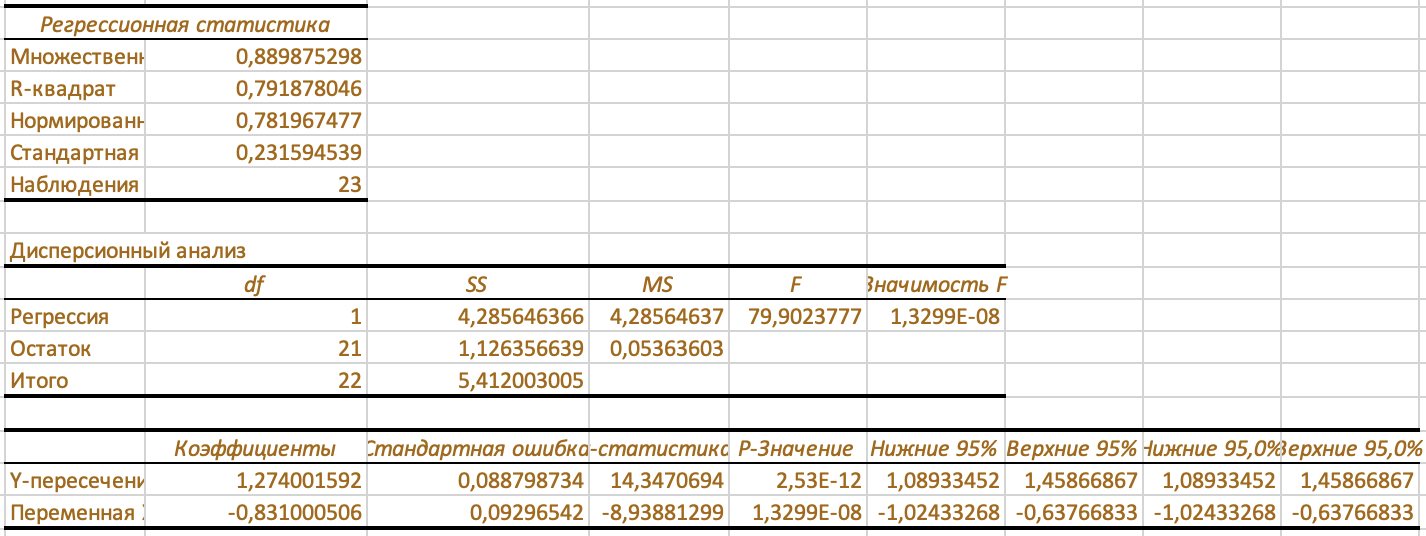

In [ ]:
alpha, beta, rho

(2.394317451664943, -0.8309537491878978, 0.4672310470535273)

In [ ]:
# => Yt = 2,394 - 0,831Xt + 0,468et
#         (0.089) (0.093)  ()

In [ ]:
# dl = 1.27
# du = 1.45
# попали в интервал от 0 до dl => есть положительная автокорреляция
model_start = OLS(data[0], sm.add_constant(data[1]))
results_start = model_start.fit()
y_pred_start = results_start.predict(sm.add_constant(data[1]).iloc[1:])
residuals_start = data.iloc[1:, 1] - y_pred_start
y_pred_new = alpha + beta*data.iloc[1:, 1] + rho*residuals_start
residuals_new = data[0][1:] - y_pred_new
DW = durbin_watson(residuals_new)
DW

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


1.6800560767969166

In [ ]:
# DW = 1.6800560767969166 попадает в интервал от du до 4-du, => нет автокорреляции

#### Иривин и Стьюдент для выявления аномальных значений

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('данные_аномал.xlsx', header=0)

In [ ]:
data.drop(index=0, inplace=True)

In [ ]:
data

,N,T,IR_M
1,1.0,1997 1,13.993
2,2.0,2,15.208
3,3.0,3,16.495
4,4.0,4,18.184
5,5.0,5,20.016
...,...,...,...
296,296.0,8,618.2
297,297.0,9,614.1
298,298.0,10,624.2
299,299.0,11,622.5


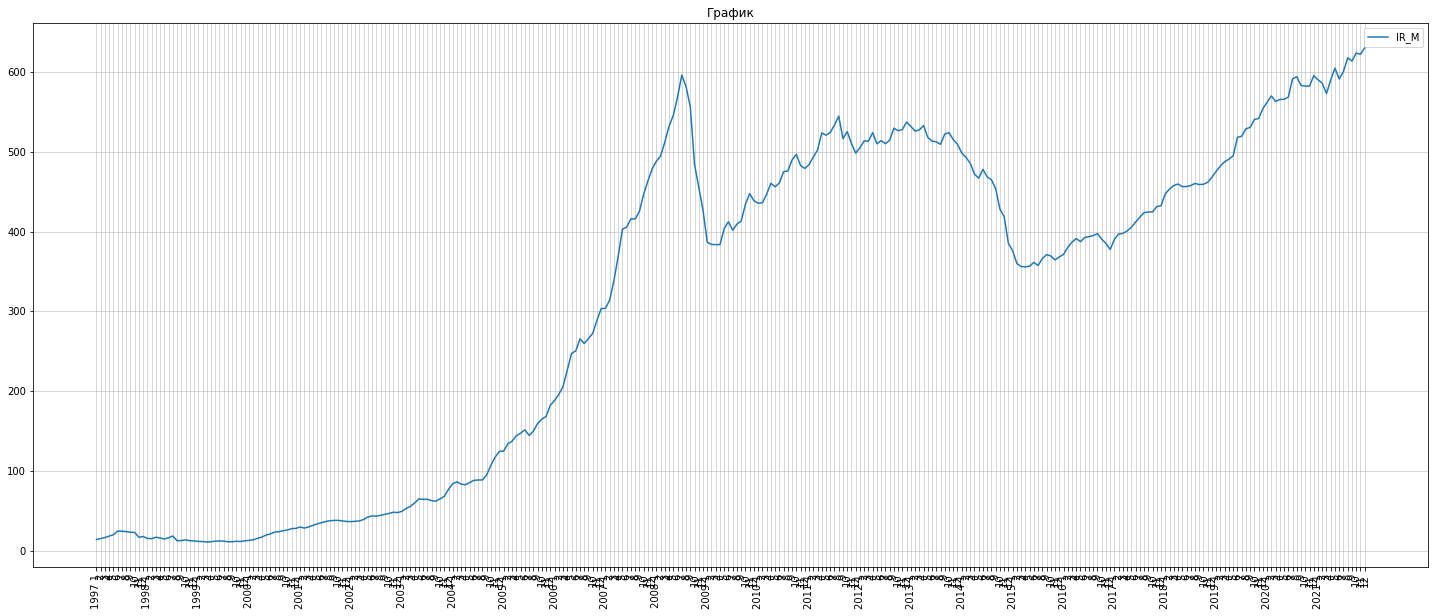

In [ ]:
ax = data.plot(y='IR_M',
               figsize=(25, 10), title='График',
               rot=30)
ax.grid(lw=0.5)
ax.set_xticks(data['N'])
ax.set_xticklabels(data['T'], rotation=90);

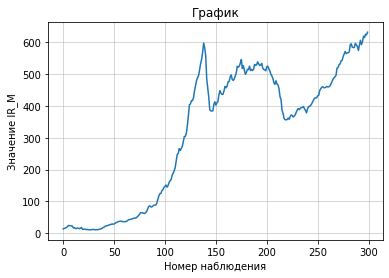

In [ ]:
plt.plot(data['IR_M'].values)
plt.grid(lw=0.5)
plt.xlabel("Номер наблюдения")
plt.ylabel("Значение IR_M")
plt.title("График");

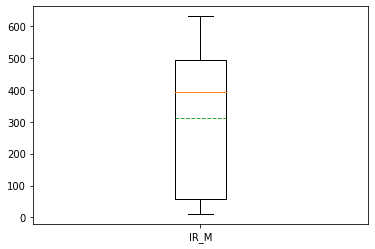

In [ ]:
plt.boxplot(data['IR_M'], showmeans=True, meanline=True, labels=['IR_M']);
# оранжевая – медиана
# зеленая – среднее
# выбросов нет

In [ ]:
# Ирвин
# Особенности.
# Табличные значения критерия Ирвина рассчитаны не для всех объемов выборки
# (но есть методы аппроксимации). Ирвин смотрит по отношению с предыдущим значением,
# поэтому если 2020 - аномалия, то он “потянет” аномальность на 2021 год.
# Ирвин не подходит для сезонных данных, так как идет вычитание из предыдущего.

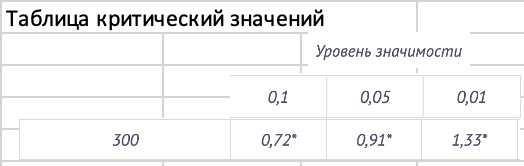

In [ ]:
Sy = data['IR_M'].std()
dif = (data['IR_M'][1:].reset_index(drop=True) - \
       data['IR_M'][:-1].reset_index(drop=True))
l_n = list(dif / Sy)
data['lambda_набл'] = [np.nan] + l_n
data['lambda_крит'] = [np.nan] + [0.9] * (data.shape[0] - 1)  # из таблицы по n

In [ ]:
data['irvin'] = data['lambda_набл'] > data['lambda_крит']

In [ ]:
data['irvin'].sum()  # по Ирвину на ур знач 5% нет аномал знач

0

In [ ]:
# Стьюдент
# Лучше работает с выборкой небольшого объема n ≤ 25. Если попало во вторую группу,
# можно случайно сделать
# неправильный вывод, требуются дополнительные тесты. Если наблюдается стабильный рост,
# тогда начальные и конечные наблюдения будут выбиваться, так как Стьюдент смотрит на середину
# ряда. Если 2020 год - аномалия, то может показать, что 2019 год - тоже аномалия.
# Стоит использовать, когда имеем дело с ровным, небыстро растущим трендом.

In [ ]:
from scipy.stats import t

In [ ]:
data = pd.read_excel('данные_аномал.xlsx', header=0)

In [ ]:
data.drop(index=0, inplace=True)

In [ ]:
data['tao'] = abs(data['IR_M'] - data['IR_M'].mean()) / data['IR_M'].std()

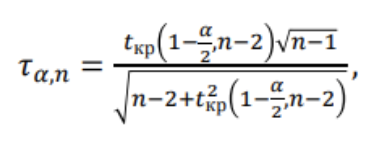

In [ ]:
n = data['IR_M'].shape[0]
def culc_crit(alpha, n):
    a = (t.isf(alpha/2, n-2) * np.sqrt(n-1))
    b = np.sqrt(n - 2 + t.isf(alpha/2, n-2)**2)
    return a/b

In [ ]:
data['crit5'] = culc_crit(0.05, n)
data['crit1'] = culc_crit(0.001, n)

In [ ]:
def get_group(crit5, crit1, tao):
    if tao <= crit5:
        # не аномал
        return 0
    elif crit5 < tao <= crit1:
        # может быть аномал, если есть и другие поводы
        return 1
    else:
        # аномал
        return 2
res = []
for i in data.index.values:
    res.append(get_group(data['crit5'][i], data['crit1'][i], data['tao'][i]))
data['group'] = res

In [ ]:
data['group'].value_counts()  # по методу Стьюдента нет аномал набл

0    300
Name: group, dtype: int64

#### Зарембки

In [ ]:
# Тест Зарембки применим для выбора из двух форм моделей (несравнимых непосредственно),
# в одной из которых зависимая переменная входит с логарифмом, а в другой – нет.
# Метод позволяет оценить значимость наблюдаемых различий. Предполагается, что yi > 0 для любого i
# Не нужно применять данный метод для уравнений одной функциональной формы,
# а так же для сравнения между собой иных форм, кроме линейной и логарифмической
# (двойная-логарифмическая; линейно-логарифмическая; обратная).

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('данные_тесты.xlsx', header=0)

In [ ]:
data.drop(index=0, inplace=True)

In [ ]:
data

,T,t,WAG_M Y
1,1993 1,1.0,100
2,2,2.0,99.04
3,3,3.0,101.77
4,4,4.0,110.05
5,5,5.0,115.47
...,...,...,...
343,7,343.0,280.4
344,8,344.0,265
345,9,345.0,274.8
346,10,346.0,271


In [ ]:
from scipy.stats.mstats import gmean

In [ ]:
gm = gmean(data['WAG_M Y'].to_list())  # среднее геометрическое

In [ ]:
data['Ystar'] = data['WAG_M Y']/gm
data['LN_Ystar'] = np.log(data['Ystar'].to_list())

In [ ]:
data

,T,t,WAG_M Y,Ystar,LN_Ystar
1,1993 1,1.0,100,0.672847,-0.396237
2,2,2.0,99.04,0.666388,-0.405884
3,3,3.0,101.77,0.684756,-0.378692
4,4,4.0,110.05,0.740468,-0.300473
5,5,5.0,115.47,0.776937,-0.252397
...,...,...,...,...,...
343,7,343.0,280.4,1.886663,0.634810
344,8,344.0,265,1.783045,0.578322
345,9,345.0,274.8,1.848984,0.614636
346,10,346.0,271,1.823416,0.600711


In [ ]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
# ESS1
x = sm.add_constant(data['t']).values
y = data['Ystar'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
ESS1 = sum((y - results.predict(x).reshape(-1, 1))**2)[0]
# ESS2
x = sm.add_constant(data['t']).values
y = data['LN_Ystar'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
ESS2 = sum((y - results.predict(x).reshape(-1, 1))**2)[0]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
n = data.shape[0]
z_stat = abs(n/2 * np.log(ESS1/ ESS2))
z_stat

41.85934989078163

In [ ]:
from scipy.stats import chi2
chi2_crit = chi2.isf(0.05, 1)
chi2_crit

3.8414588206941285

In [ ]:
# Zнабл > Chi-2табл, следовательно,
# гипотеза об отсутствии статистически значимых различиях отвергается,
# выбираем модель полулогарифмическую

#### Бокса-Кокса

In [ ]:
# В тесте Бокса-Кокса предполанается, что yi > 0 для любого i. Тест Бокса-Кокса основывается
# на утверждении о том, что (у-1) и logy являются частными случаями функции вида
# F = (y^lamda - 1) / lambda
# Параметр lambda можно выбирать, максимизируя логарифм правдоподобия. Еще один способ
# поиска оптимального значения параметра основан на поиске максимальной величины коэффициента
# корреляции между квантилями функции нормального распределения и отсортированной преобразованной
# последовательностью.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('данные_тесты.xlsx', header=0)

In [ ]:
data.drop(index=0, inplace=True)

In [ ]:
data

,T,t,WAG_M Y
1,1993 1,1.0,100
2,2,2.0,99.04
3,3,3.0,101.77
4,4,4.0,110.05
5,5,5.0,115.47
...,...,...,...
343,7,343.0,280.4
344,8,344.0,265
345,9,345.0,274.8
346,10,346.0,271


In [ ]:
from scipy.stats.mstats import gmean

In [ ]:
gm = gmean(data['WAG_M Y'].to_list())  # среднее геометрическое

In [ ]:
data['Ystar'] = data['WAG_M Y']/gm

In [ ]:
data

,T,t,WAG_M Y,Ystar
1,1993 1,1.0,100,0.672847
2,2,2.0,99.04,0.666388
3,3,3.0,101.77,0.684756
4,4,4.0,110.05,0.740468
5,5,5.0,115.47,0.776937
...,...,...,...,...
343,7,343.0,280.4,1.886663
344,8,344.0,265,1.783045
345,9,345.0,274.8,1.848984
346,10,346.0,271,1.823416


In [ ]:
# Вводится новая переменная lambda
# (lambda=1 приводит к обычной линейной форме, lambda->0 приводит к логорифмической)

In [ ]:
def get_res_test(list_lambda, data, min_ESS=10**5, min_i=10**5):
    dt = data.copy()
    min_res = {'model': None,
               'results': None,
               'ESS': None,
               'lambda': None}
    for i in range(len(list_lambda)):
        dt[f'new_Y{i}'] = (dt['Ystar']**list_lambda[i]) / list_lambda[i]
        dt[f'new_X{i}'] = (dt['t']**list_lambda[i]) / list_lambda[i]
        x = sm.add_constant(dt[f'new_X{i}']).values
        y = dt[f'new_Y{i}'].values.reshape(-1, 1)
        model = OLS(y, x)
        results = model.fit()
        ESS = sum((y - results.predict(x).reshape(-1, 1))**2)[0]
        if min_res['ESS'] is None or min_res['ESS'] > ESS:
            min_res['ESS'] = ESS
            min_res['model'] = model
            min_res['results'] = results
            min_res['lambda'] = list_lambda[i]
    return min_res

In [ ]:
get_res_test([0.1, 0.5, 0.9], data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


{'ESS': 13.014043287523673,
 'lambda': 0.9,
 'model': <statsmodels.regression.linear_model.OLS at 0x7f0215051f50>,
 'results': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f02150517d0>}

In [ ]:
# Далее необходимо рассматривать окрестность Lambda=0,9. Выбор оптимального значения
# Lambda – это задача оптимизации. Однако Lambda -> 1, следовательно,
# функция принимает линейный вид

#### Акаике

In [ ]:
# Критерий связан с понятием расстояния Кульбака — Лейблера (Kullback–Leibler),
# при помощи которого можно оценить расстояние между моделями.
# Проверка критерия является трудоемкой операцией. Подходит для моделей с одинаковой зависимой
# переменной. Нельзя применять для сравнения y и ln(y)

In [ ]:
# Информационные критерии используются для сравнения моделей с разным числом параметров,
# когда требуется выбрать наилучший набор объясняющих переменных.
# Данные критерии учитывают число наблюдений n и число параметров модели p и отличаются
# друг от друга видом «функции штрафа» за число параметров. Все критерии рассчитываются на
# основе логарифма функции правдоподобия LogL, что позволяет применять их к широкому спектру
# моделей. Для информационных критериев действует правило: наилучшая модель имеет наименьшее
# значение критерия.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('данные_тесты.xlsx', header=0)

In [ ]:
data.drop(index=0, inplace=True)

In [ ]:
data

,T,t,WAG_M Y
1,1993 1,1.0,100
2,2,2.0,99.04
3,3,3.0,101.77
4,4,4.0,110.05
5,5,5.0,115.47
...,...,...,...
343,7,343.0,280.4
344,8,344.0,265
345,9,345.0,274.8
346,10,346.0,271


In [ ]:
def get_AIC(x, y, n, k):
    """
    n - длина выборки
    k – количество регрессоров
    """
    model = OLS(y, x)
    results = model.fit()
    ESS = sum((y - results.predict(x).reshape(-1, 1))**2)[0]
    print(f'ESS = {ESS}')
    AIC = np.log(ESS/n) + 2*k/n + 1 + np.log(2*np.pi)
    return AIC

In [ ]:
x = sm.add_constant(data['t']).values
y = data['WAG_M Y'].values.reshape(-1, 1)
AIC1 = get_AIC(x, y, n=data.shape[0], k=1)

ESS = 269344.5904199037


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
x = sm.add_constant(data['t']).values
y = np.log(data['WAG_M Y'].to_list()).reshape(-1, 1)
AIC2 = get_AIC(x, y, n=data.shape[0], k=1)

ESS = 15.521037185387671


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
AIC1

9.498062819298486

In [ ]:
AIC2

-0.26348768329919814

In [ ]:
# Предпочтение отдается модели с наименьшим AIC, то есть полулогарифмической
# НО ЭТОТ КРИТЕРИЙ НЕ ИСПОЛЬЗУЮТ ДЛЯ ЭТОГО

#### Шварц

In [ ]:
# Если важна простота модели, то чаще используют этот критерий по сравнению с Акаике.
# Подходит для моделей с одинаковой зависимой переменной. Нельзя применять для сравнения y и ln(y)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('данные_тесты.xlsx', header=0)

In [ ]:
data.drop(index=0, inplace=True)

In [ ]:
data

,T,t,WAG_M Y
1,1993 1,1.0,100
2,2,2.0,99.04
3,3,3.0,101.77
4,4,4.0,110.05
5,5,5.0,115.47
...,...,...,...
343,7,343.0,280.4
344,8,344.0,265
345,9,345.0,274.8
346,10,346.0,271


In [ ]:
def get_SC(x, y, n, k):
    """
    n - длина выборки
    k – количество регрессоров
    """
    model = OLS(y, x)
    results = model.fit()
    ESS = sum((y - results.predict(x).reshape(-1, 1))**2)[0]
    print(f'ESS = {ESS}')
    SC = np.log(ESS/n) + k*np.log(n)/n + 1 + np.log(2*np.pi)
    return SC

In [ ]:
x = sm.add_constant(data['t']).values
y = data['WAG_M Y'].values.reshape(-1, 1)
SC1 = get_SC(x, y, n=data.shape[0], k=1)

ESS = 269344.5904199037


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
x = sm.add_constant(data['t']).values
y = np.log(data['WAG_M Y'].to_list()).reshape(-1, 1)
SC2 = get_SC(x, y, n=data.shape[0], k=1)

ESS = 15.521037185387671


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
SC1

9.509155974283924

In [ ]:
SC2

-0.2523945283137605

In [ ]:
# Предпочтение отдается модели с наименьшим SC, то есть полулогарифмической
# НО ЭТОТ КРИТЕРИЙ НЕ ИСПОЛЬЗУЮТ ДЛЯ ЭТОГО

#### Бера и МакАлера

In [ ]:
# Предполагается, что yi > 0 для любого i. А также преобразованные данные  y^ > 0

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('данные_тесты.xlsx', header=0)

In [ ]:
data.drop(index=0, inplace=True)

In [ ]:
data['LN Y'] = np.log(data['WAG_M Y'].to_list())

In [ ]:
data

,T,t,WAG_M Y,LN Y
1,1993 1,1.0,100,4.605170
2,2,2.0,99.04,4.595524
3,3,3.0,101.77,4.622715
4,4,4.0,110.05,4.700935
5,5,5.0,115.47,4.749011
...,...,...,...,...
343,7,343.0,280.4,5.636217
344,8,344.0,265,5.579730
345,9,345.0,274.8,5.616044
346,10,346.0,271,5.602119


In [ ]:
# этап 1
x = sm.add_constant(data['t']).values
y = data['WAG_M Y'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
data['Yhat'] = results.predict(x)

x = sm.add_constant(data['t']).values
y = data['LN Y'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
data['LNYhat'] = results.predict(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# этап 2
data['exp(LNYhat)'] = np.exp(data['LNYhat'].to_list())
data['LN(Yhat)'] = np.log(data['Yhat'].to_list())

In [ ]:
data

,T,t,WAG_M Y,LN Y,Yhat,LNYhat,exp(LNYhat),LN(Yhat)
1,1993 1,1.0,100,4.605170,43.748457,4.198151,66.563140,3.778456
2,2,2.0,99.04,4.595524,44.465177,4.202794,66.872918,3.794706
3,3,3.0,101.77,4.622715,45.181896,4.207437,67.184137,3.810696
4,4,4.0,110.05,4.700935,45.898616,4.212080,67.496805,3.826435
5,5,5.0,115.47,4.749011,46.615336,4.216723,67.810929,3.841930
...,...,...,...,...,...,...,...,...
343,7,343.0,280.4,5.636217,288.866624,5.786091,325.737355,5.665965
344,8,344.0,265,5.579730,289.583344,5.790734,327.253303,5.668443
345,9,345.0,274.8,5.616044,290.300063,5.795378,328.776306,5.670915
346,10,346.0,271,5.602119,291.016783,5.800021,330.306397,5.673381


In [ ]:
x = sm.add_constant(data['t']).values
y = data['exp(LNYhat)'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
v1_exp = y - results.predict(x).reshape(-1, 1)

x = sm.add_constant(data['t']).values
y = data['LN(Yhat)'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
v2_ln = y - results.predict(x).reshape(-1, 1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
data['v1_exp'] = v1_exp
data['v2_ln'] = v2_ln

In [ ]:
# этап 3
x = sm.add_constant(data[['t', 'v1_exp']]).values
y = data['LN Y'].values.reshape(-1, 1)
model_lny = OLS(y, x)
results_lny = model_lny.fit()

x = sm.add_constant(data[['t', 'v2_ln']]).values
y = data['WAG_M Y'].values.reshape(-1, 1).astype('float64')
model_y = OLS(y, x)
results_y = model_y.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(results_lny.summary())  # тета1

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     834.6
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.04e-132
Time:                        17:03:55   Log-Likelihood:                 47.197
No. Observations:                 347   AIC:                            -88.39
Df Residuals:                     344   BIC:                            -76.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1935      0.023    183.736      0.0

In [ ]:
print(results_y.summary())  # тета2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1520.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.68e-171
Time:                        17:03:56   Log-Likelihood:                -1603.1
No. Observations:                 347   AIC:                             3212.
Df Residuals:                     344   BIC:                             3224.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.0317      2.653     16.218      0.0

In [ ]:
teta1 = results_lny.params[-1]
teta2 = results_y.params[-1]

In [ ]:
from scipy.stats import t
t_crit = t.isf(0.05/2, 344)  # из вывода регрессии
t_crit

1.9668840363000124

In [ ]:
# Из вывода регрессий: при сравнении t-статистики наблюдаемой с критическим значением, видно,
# что коэфф teta1 – незнач, teta2 – знач

In [ ]:
# Если коэффициент тета1 незначим, то выбирается полулогарифмическая модель.
# Если коэффициент тета2 незначим, то выбирается линейная модель.
# В случае если оба коэффициента одновременно значимы или незначимы,
# мы не можем выбрать одну из моделей.

#### МакКиннон, Уайт, Дэвидсон

In [ ]:
# Предполагается, что yi > 0 для любого i. А также преобразованные данные  y^ > 0

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('данные_тесты.xlsx', header=0)

In [ ]:
data.drop(index=0, inplace=True)

In [ ]:
data['LN Y'] = np.log(data['WAG_M Y'].to_list())

In [ ]:
data

,T,t,WAG_M Y,LN Y
1,1993 1,1.0,100,4.605170
2,2,2.0,99.04,4.595524
3,3,3.0,101.77,4.622715
4,4,4.0,110.05,4.700935
5,5,5.0,115.47,4.749011
...,...,...,...,...
343,7,343.0,280.4,5.636217
344,8,344.0,265,5.579730
345,9,345.0,274.8,5.616044
346,10,346.0,271,5.602119


In [ ]:
# этап 1
x = sm.add_constant(data['t']).values
y = data['WAG_M Y'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
data['Yhat'] = results.predict(x)

x = sm.add_constant(data['t']).values
y = data['LN Y'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
data['LNYhat'] = results.predict(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
data.head(1)

,T,t,WAG_M Y,LN Y,Yhat,LNYhat
1,1993 1,1.0,100,4.60517,43.748457,4.198151


In [ ]:
# Если сравнение между линейной и полулогарифмической

In [ ]:
data['Yhat-exp(lnyhat)'] = data['Yhat'] - np.exp(data['LNYhat'].to_list())
data['lnYhat-lnyhat'] = np.log(data['Yhat'].to_list()) - data['LNYhat']

In [ ]:
# этап 2
x = sm.add_constant(data[['t', 'Yhat-exp(lnyhat)']]).values.astype('float64')
y = data['LN Y'].values.reshape(-1, 1).astype('float64')
model_lny = OLS(y, x)
results_lny = model_lny.fit()

x = sm.add_constant(data[['t', 'lnYhat-lnyhat']]).values.astype('float64')
y = data['WAG_M Y'].values.reshape(-1, 1).astype('float64')
model_y = OLS(y, x)
results_y = model_y.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(results_lny.summary())  # gamma1

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     834.6
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.04e-132
Time:                        17:33:12   Log-Likelihood:                 47.197
No. Observations:                 347   AIC:                            -88.39
Df Residuals:                     344   BIC:                            -76.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1892      0.023    180.251      0.0

In [ ]:
print(results_y.summary())  # gamma2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1520.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.68e-171
Time:                        17:33:14   Log-Likelihood:                -1603.1
No. Observations:                 347   AIC:                             3212.
Df Residuals:                     344   BIC:                             3224.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.7763      2.688     14.428      0.0

In [ ]:
gamma1 = results_lny.params[-1]
gamma2 = results_y.params[-1]

In [ ]:
from scipy.stats import t
t_crit = t.isf(0.05/2, 344)  # из вывода регрессии
t_crit

1.9668840363000124

In [ ]:
# Из вывода регрессий: при сравнении t-статистики наблюдаемой с критическим значением, видно,
# что коэфф gamma1 – незнач, gamma2 – знач

In [ ]:
# Если коэффициент gamma1 незначим, то выбирается полулогарифмическая модель.
# Если коэффициент gamma2 незначим, то выбирается линейная модель.
# В случае если оба коэффициента одновременно значимы или незначимы,
# мы не можем выбрать одну из моделей.

In [ ]:
# Если сравнение между линейной и линейной в логарифмах

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('данные_тесты.xlsx', header=0)

In [ ]:
data.drop(index=0, inplace=True)

In [ ]:
data['LN Y'] = np.log(data['WAG_M Y'].to_list())

In [ ]:
data['Ln t'] = np.log(data['t'].to_list())

In [ ]:
# этап 1
x = sm.add_constant(data['t']).values
y = data['WAG_M Y'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
data['Yhat'] = results.predict(x)

x = sm.add_constant(data['Ln t']).values
y = data['LN Y'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
data['LNYhat'] = results.predict(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
data.head(1)

,T,t,WAG_M Y,LN Y,Ln t,Yhat,LNYhat
1,1993 1,1.0,100,4.60517,0.0,43.748457,3.156874


In [ ]:
# Если сравнение между линейной и полулогарифмической

In [ ]:
data['Yhat-exp(lnyhat)'] = data['Yhat'] - np.exp(data['LNYhat'].to_list())
data['lnYhat-lnyhat'] = np.log(data['Yhat'].to_list()) - data['LNYhat']

In [ ]:
# этап 2
x = sm.add_constant(data[['Ln t', 'Yhat-exp(lnyhat)']]).values.astype('float64')
y = data['LN Y'].values.reshape(-1, 1).astype('float64')
model_lny = OLS(y, x)
results_lny = model_lny.fit()

x = sm.add_constant(data[['t', 'lnYhat-lnyhat']]).values.astype('float64')
y = data['WAG_M Y'].values.reshape(-1, 1).astype('float64')
model_y = OLS(y, x)
results_y = model_y.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(results_lny.summary())  # delta1

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     931.6
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.41e-139
Time:                        17:36:50   Log-Likelihood:                 63.152
No. Observations:                 347   AIC:                            -120.3
Df Residuals:                     344   BIC:                            -108.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2720      0.069     61.517      0.0

In [ ]:
print(results_y.summary())  # delta2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1497.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.83e-170
Time:                        17:37:02   Log-Likelihood:                -1605.5
No. Observations:                 347   AIC:                             3217.
Df Residuals:                     344   BIC:                             3228.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.1703      5.215     16.525      0.0

In [ ]:
delta1 = results_lny.params[-1]
delta2 = results_y.params[-1]

In [ ]:
from scipy.stats import t
t_crit = t.isf(0.05/2, 344)  # из вывода регрессии
t_crit

1.9668840363000124

In [ ]:
# Из вывода регрессий: при сравнении t-статистики наблюдаемой с критическим значением, видно,
# что коэфф delta1 – знач, delta2 – знач

In [ ]:
# Если коэффициент delta1 незначим, то выбирается линейная в логарифмах модель.
# Если коэффициент delta2 незначим, то выбирается линейная модель.
# В случае если оба коэффициента одновременно значимы или незначимы,
# мы не можем выбрать одну из моделей.

#### Хольт

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.regression.linear_model import OLS
from scipy.stats import t
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt

In [ ]:
data = pd.read_excel('123.xlsx', sheet_name='2')
data.head()

,T,WAG_M
0,1993 1,100.00
1,2,99.04
2,3,101.77
3,4,110.05
4,5,115.47


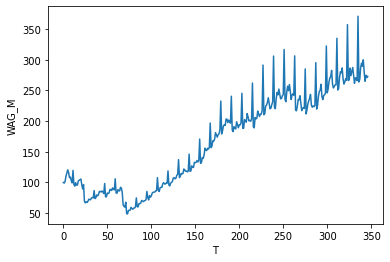

In [ ]:
plt.plot(data.WAG_M.values)
plt.xlabel('T')
plt.ylabel('WAG_M')
plt.show()

In [ ]:
data['t'] = [x for x in range(1, len(data)+1)]
data.head()

,T,WAG_M,t
0,1993 1,100.00,1
1,2,99.04,2
2,3,101.77,3
3,4,110.05,4
4,5,115.47,5


In [ ]:
T_preds = 4 # предсказать на 4 периода вперёд

In [ ]:
y = data.WAG_M
x = data.t
model = ExponentialSmoothing(y, seasonal='add', seasonal_periods=12).fit()
pred = model.predict(start=x[0], end=list(x.values)[-1]+T_preds)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [ ]:
# Предсказание на 4 периода вперёд
pred.values[-4:]

array([263.49249045, 269.3639206 , 288.21385569, 289.35686806])

In [ ]:
X = list(x.values)
for i in range(T_preds):
  X.append(X[-1]+1)

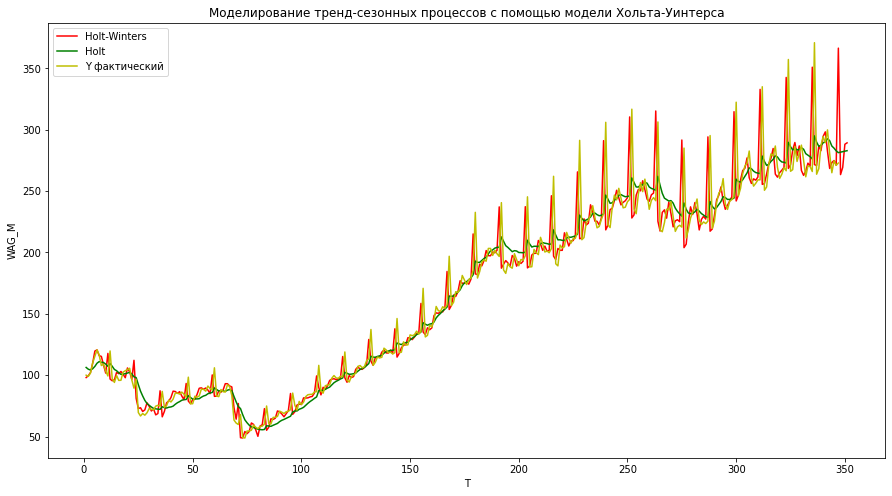

In [ ]:
plt.figure(figsize = (15, 8))
plt.title('Моделирование тренд-сезонных процессов с помощью модели Хольта-Уинтерса')
plt.plot(X, pred, label='Holt-Winters', color='r')
plt.plot(X, pred1, label='Holt', color='g')
plt.plot(x, y, label='Y фактический', color='y')
plt.xlabel('T')
plt.ylabel('WAG_M')
plt.legend(loc='best')
plt.show()

In [ ]:
model1 = Holt(y).fit()
pred1 = model1.predict(start=x[0], end=list(x.values)[-1]+T_preds)

In [ ]:
pred1

1      106.290043
2      104.851992
3      104.183861
4      105.229075
5      107.147658
          ...    
347    281.370338
348    281.770888
349    282.171438
350    282.571988
351    282.972539
Length: 351, dtype: float64

#### Браун

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.regression.linear_model import OLS
from scipy.stats import t
import statsmodels.api as sm

In [ ]:
data = pd.read_excel('123.xlsx', sheet_name='2')
data.head()

,T,WAG_M
0,1993 1,100.00
1,2,99.04
2,3,101.77
3,4,110.05
4,5,115.47


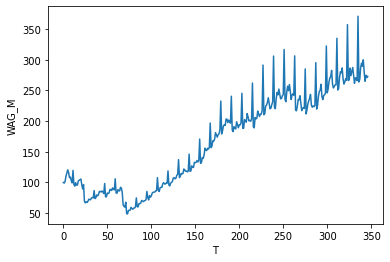

In [ ]:
plt.plot(data.WAG_M.values)
plt.xlabel('T')
plt.ylabel('WAG_M')
plt.show()

In [ ]:
data['t'] = [x for x in range(1, len(data)+1)]
data.head()

,T,WAG_M,t
0,1993 1,100.00,1
1,2,99.04,2
2,3,101.77,3
3,4,110.05,4
4,5,115.47,5


In [ ]:
alpha, beta, k = 0.2, 0.8, 1
T_preds = 4 # предсказать на 4 периода вперёд

In [ ]:
x = data.t[:36]
y = data.WAG_M[:36]  # вместо 36 в оба случая запихать int(0.2*len(data))
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
results.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    116.540968
t         -1.263461
dtype: float64

In [ ]:
a0 = results.params[0]
a1 =results.params[1]
a0, a1

(116.54096825396815, -1.2634607464607466)

In [ ]:
y = data.WAG_M.values

In [ ]:
y_model, A0, A1, e = [], [], [], []
for i in range(len(y)):
  y_model.append(a0 + a1*k)
  e.append(y[i] - y_model[i])
  A0.append(a0 + a1 + (1 - beta)**2*e[i])
  A1.append(a1 + (1 - beta)**2*e[i])
  a0 = A0[-1]
  a1 = A1[-1]

In [ ]:
t_pred = [x for x in range(1, T_preds+1)]

point_pred = []
a0, a1 = A0[-1], A1[-1]
for i in range(T_preds):
  point_pred.append(a0+a1*t_pred[i])
point_pred

[283.84833653762, 282.12416095673336, 280.3999853758467, 278.67580979496006]

In [ ]:
t_a = t.isf(0.2/2, len(data)-2) * np.sqrt(len(data)-1) / np.sqrt(len(data) - 2 + t.isf(0.2/2, len(data)-2)**2)
Sy = np.var(y_model)**0.5
t_a, Sy

(1.2828082929613378, 76.6681718867237)

In [ ]:
U_k = []
t = [max(data.t.values) + x for x in range(1, T_preds+1)]
n = len(data)
for i in range(T_preds):
  U_k.append(t_a*Sy*(1 + 1/(n+t[i]) + 3*((n+t[i])+2*i-1)**2/((n+t[i])**3-(n+t[i])))**0.5)
U_k

[98.63257563809441, 98.63338659452309, 98.63419520982075, 98.63500147921606]

In [ ]:
t

[348, 349, 350, 351]

In [ ]:
pd.DataFrame({'y-': np.array(point_pred) - np.array(U_k),
              'yпрог': point_pred,
              'y+': np.array(point_pred) + np.array(U_k)})

,y-,yпрог,y+
0,185.215761,283.848337,382.480912
1,183.490774,282.124161,380.757548
2,181.765790,280.399985,379.034181
3,180.040808,278.675810,377.310811


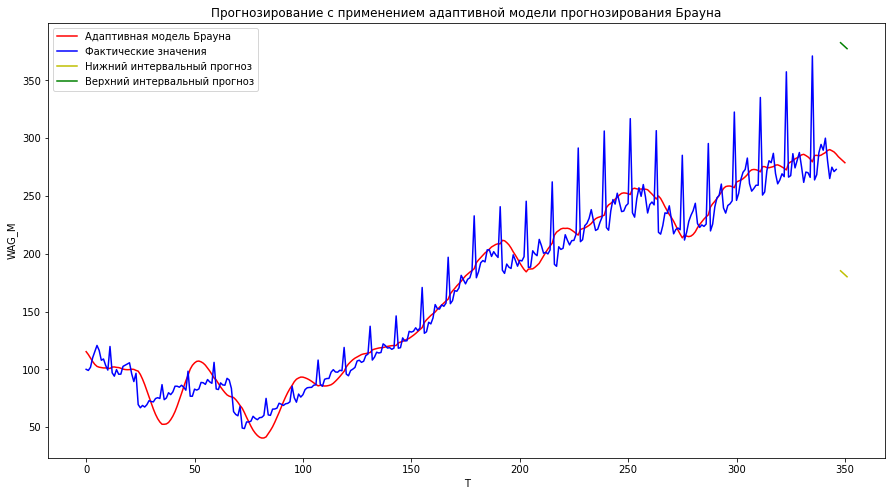

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(y_model+point_pred, color='r', label='Адаптивная модель Брауна')
plt.plot(data.WAG_M.values, color='b', label='Фактические значения')
plt.plot(t, np.array(point_pred) - np.array(U_k), color = 'y', label='Нижний интервальный прогноз')
plt.plot(t, np.array(point_pred) + np.array(U_k), color = 'g', label='Верхний интервальный прогноз')
plt.title('Прогнозирование с применением адаптивной модели прогнозирования Брауна')
plt.xlabel('T')
plt.ylabel('WAG_M')
plt.legend()
plt.show()

#### Метод Фостера-Стьюарта

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

In [ ]:
data = pd.read_excel('123.xlsx', sheet_name='2')
data.head()

,T,WAG_M
0,1993 1,100.00
1,2,99.04
2,3,101.77
3,4,110.05
4,5,115.47


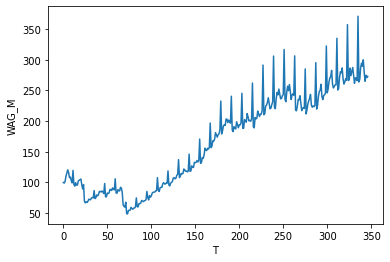

In [ ]:
plt.plot(data.WAG_M.values)
plt.xlabel('T')
plt.ylabel('WAG_M')
plt.show()

Тренд, или основная тенденция. f(t) - это устойчивая закономерность, наблюдаемая в течение длительного периода времени. (Длительная, “вековая” закономерность изменения уровней). Тренд определяет общее направление развития экономического процесса.

In [ ]:
y = data.WAG_M.values
y

array([100.  ,  99.04, 101.77, 110.05, 115.47, 120.65, 116.38, 107.85,
       108.93, 103.39,  99.35, 119.75,  97.  ,  94.09,  99.74,  95.75,
        95.84, 102.55, 103.58, 104.61, 105.66,  96.15,  89.42,  96.57,
        69.53,  66.75,  68.75,  67.38,  69.4 ,  72.87,  72.14,  71.85,
        74.73,  75.47,  74.79,  86.76,  73.75,  75.22,  79.74,  78.14,
        80.48,  85.39,  85.39,  84.54,  86.23,  84.51,  81.97,  98.37,
        76.73,  76.73,  82.86,  82.03,  83.02,  88.66,  88.4 ,  86.98,
        91.16,  89.15,  87.91, 106.01,  83.01,  82.51,  88.29,  86.52,
        86.26,  92.21,  90.74,  83.48,  63.44,  60.97,  59.81,  67.89,
        49.22,  48.77,  54.48,  54.48,  55.13,  59.38,  57.54,  56.45,
        58.2 ,  58.43,  60.18,  74.87,  60.57,  60.2 ,  65.56,  65.69,
        66.41,  70.67,  69.82,  68.77,  70.21,  70.57,  71.91,  85.42,
        75.43,  71.58,  78.6 ,  76.  ,  78.06,  82.51,  84.07,  84.33,
        84.41,  86.27,  86.61, 108.  ,  87.16,  85.33,  91.39,  92.03,
      

In [ ]:
k_t, l_t = [], []
for i in range(1, len(y)):
  if y[i] > max(y[:i]):
    k_t.append(1)
  if y[i] < max(y[:i]):
    k_t.append(0)
  if y[i] < min(y[:i]):
    l_t.append(1)
  if y[i] > min(y[:i]):
    l_t.append(0)
k_t = np.array(k_t)
l_t = np.array(l_t)

In [ ]:
s = sum(k_t + l_t)
d = sum(k_t - l_t)
s, d

(30, 8)

In [ ]:
len(data)

347

In [ ]:
sigma1 = (2*np.log(len(data))-3.4253)**0.5
sigma2 = (2*np.log(len(data))-0.8456)**0.5
mu = (1.693872*np.log(len(data)) - 0.299015)/(1 - 0.035092*np.log(len(data)) + 0.002705*(np.log(len(data))**2))
ts = abs(s - mu)/sigma1
td = abs(d - 0)/sigma2
ts, td

(6.664835938667151, 2.42836572202624)

In [ ]:
tcrit = t.isf(0.05/2, len(data)-2) * np.sqrt(len(data)-1) / np.sqrt(len(data) - 2 + t.isf(0.05/2, len(data)-2)**2)
tcrit

1.958760999687843

d=o может быть и тогда, когда ряд охватывает два пе­риода с противоположными тенденциями. Кроме того, d = 0 и в случае, когда подъемы и падения уровней чередуются. Если уровни симметрично располагаются вокруг горизонтальной линии, то величина d = 0 действительно соответствует отсутствию тренда в средней. Однако при определении d не принимаются во внима­ние величины отклонений от горизонтальной линии. Поэтому мыс­лима такая ситуация, при которой отклонения с одним знаком бу­дут систематически выше отклонений с другим знаком. В этом случае тенденция средней к росту (падению) не отразится на ве­личине d.
..Он позволяет установить кроме тренда самого ряда еще и тренд дисперсии временного ряда.


In [ ]:
if tcrit > ts and tcrit > td:
  print('Тренд отсутствует')
if tcrit < ts and tcrit > td:
  print('Тренд ряда есть, а тренда дисперсии нет')
if tcrit > ts and tcrit < td:
  print('Тренда ряда нет, а тренд дисперсии есть')
if tcrit < ts and tcrit < td:
  print('Есть тренд ряда и тренд дисперсии')

Есть тренд ряда и тренд дисперсии


#### Метод проверки разности средних уровней

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f, t
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('123.xlsx', sheet_name='2')
data.head()

,T,WAG_M
0,1993 1,100.00
1,2,99.04
2,3,101.77
3,4,110.05
4,5,115.47


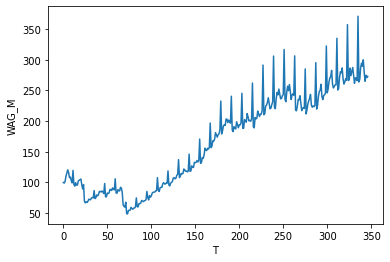

In [ ]:
plt.plot(data.WAG_M.values)
plt.xlabel('T')
plt.ylabel('WAG_M')
plt.show()

Тренд, или основная тенденция. f(t) - это устойчивая закономерность, наблюдаемая в течение длительного периода времени. (Длительная, “вековая” закономерность изменения уровней). Тренд определяет общее направление развития экономического процесса.


In [ ]:
dt1 = data.WAG_M.iloc[:int(round(len(data)/2, 0))]
dt2 = data.WAG_M.iloc[int(round(len(data)/2, 0)):]
# Проверка разбиения
len(dt1), len(dt2), len(dt1)+len(dt2), len(data)

(174, 173, 347, 347)

In [ ]:
y1_mean = dt1.values.mean()
y2_mean = dt2.values.mean()
y1_mean, y2_mean

(98.31959770114943, 237.56364161849712)

In [ ]:
Var1 = sum((dt1.values - y1_mean)**2)/(len(dt1)-1)
Var2 = sum((dt2.values - y2_mean)**2)/(len(dt2)-1)
Var1, Var2

(856.7056004152547, 1323.9321965452345)

Применим только для рядов с монотонной тенденцией. Если же ряд меняет общее направление развития, то точка поворота тенденции может ока­заться близкой к середине ряда, в силу этого средние двух отрез­ков ряда будут близки и проверка может не показать наличие тренда.



In [ ]:
if Var1 > Var2:
  F = Var1/Var2
elif Var1 < Var2:
  F = Var2/Var1
print(F)

1.5453759096514719


In [ ]:
Fcrit = f.isf(0.05, len(dt1), len(dt2))

if F > Fcrit:
  print('F > Fкр, гипотеза о равенстве дисперсий отклоняется и делается вывод,\
  \n что данный метод для определения наличия тренда ответа не дает.')
if F < Fcrit:
  print('F < Fкр => переходим к 4 шагу')

F > Fкр, гипотеза о равенстве дисперсий отклоняется и делается вывод,  
 что данный метод для определения наличия тренда ответа не дает.


In [ ]:
# 4 Шаг, если предыдущая проверка требует этого!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# sigma = (((len(dt1) - 1)*Var1 + (len(dt2) - 1)*Var2)/(len(dt1) + len(dt2) - 2))**0.5
# t_ = abs(y1_mean - y2_mean)/(sigma*(1/len(dt1) + 1/len(dt2)))

# tcrit = t.isf(0.05/2, len(data)-2) * np.sqrt(len(data)-1) / np.sqrt(len(data) - 2 + t.isf(0.05/2, len(data)-2)**2)

# if t_ < tcrit:
#   print('t < tкр, гипотеза принимается, т.е. тренда нет.')
# elif t_ > tcrit:
#   print('t > tкр, гипотеза отвергается, т.е. тренд есть.')


Если расчетное значение 𝐹 меньше табличного 𝐹кр , то гипотеза о равенстве дисперсий принимается и переходят к четвертому этапу. Если 𝐹 больше или равно 𝐹кр , гипотеза о равенстве дисперсий отклоняется и делается вывод, что данный метод для определения наличия тренда ответа не дает.

#### Критерий серий, основанный на медиане

In [ ]:
import pandas as pd
from statistics import median
from math import log10
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('123.xlsx', sheet_name='2')
data.head()

,T,WAG_M
0,1993 1,100.00
1,2,99.04
2,3,101.77
3,4,110.05
4,5,115.47


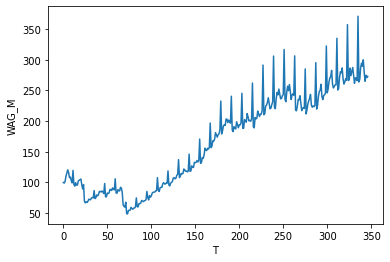

In [ ]:
plt.plot(data.WAG_M.values)
plt.xlabel('T')
plt.ylabel('WAG_M')
plt.show()

In [ ]:
data['rang'] = data.WAG_M.sort_values().values
data

,T,WAG_M,rang
0,1993 1,100.00,48.77
1,2,99.04,49.22
2,3,101.77,54.48
3,4,110.05,54.48
4,5,115.47,55.13
...,...,...,...
342,7,280.40,316.80
343,8,265.00,322.50
344,9,274.80,335.10
345,10,271.00,357.30


Тренд, или основная тенденция. f(t) - это устойчивая закономерность, наблюдаемая в течение длительного периода времени. (Длительная, “вековая” закономерность изменения уровней). Тренд определяет общее направление развития экономического процесса.

Критерий серий, основанный на медиане, улавливает только монотонное изменение среднего (оценки математического ожидания).

In [ ]:
Me = median(data.rang.values)
Me

177.65

In [ ]:
data['delta_i'] = data.WAG_M > Me
ser = data.delta_i.values
ser

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
v = list()
L = 1
for i in range(len(ser)-1):
  if ser[i] == ser[i+1]:
    L += 1
  else:
    v.append(L)
    L = 1
v.append(L)
v_n = len(v)
tau = max(v)

In [ ]:
v_n, tau

(6, 171)

In [ ]:
n = len(data.WAG_M)
first = 3.3*(log10(n)+ 1)
second = 1/2*(n+1-1.96*(n-1)**0.5)

In [ ]:
pd.DataFrame({'Params': ['tau_max', 'v'], 'Score':[tau, v_n],
              'Statistic':[first, second]})

,Params,Score,Statistic
0,tau_max,171,11.683087
1,v,6,155.770946


In [ ]:
# Если tau_max (Score) < рассчётного значения (Statistic)
# и v (Score) > рассчётного значения (Statistic),
# тогда можно говорить о том, что тенденции (трендна) нет.
# В нашем случае оба неравенства не выполняется, соответственно, тренд есть.

if tau > first and v_n < second:
  print('Оба из неравенства нарушаются, это означает, что тенденция (тренд) есть.')
else:
  print('Трнда нет')

Оба из неравенства нарушаются, это означает, что тенденция (тренд) есть.


#### Хилдрета-Лу

In [ ]:
import pandas as pd

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS

In [ ]:
data = pd.read_excel('123.xlsx', sheet_name='1', header=None, names=['y', 'X'])
data.head()

,y,X
0,0.548,2.158
1,0.663,1.573
2,1.115,0.982
3,1.428,0.982
4,0.924,0.948


In [ ]:
rho = [-0.99, -0.5, 0, 0.5, 0.99]
ESS, a_hat, b_hat, res, residuals = [], [], [], [], []

In [ ]:
for r in rho:
  yt1 = data.y[:-1].values
  yt = data.y[1:].values
  ynew = yt-yt1*r

  Xt1 = data.X[:-1].values
  Xt = data.X[1:].values
  Xnew = Xt-Xt1*r

  Xnew1 = sm.add_constant(Xnew)
  model = sm.OLS(ynew, Xnew1)
  results = model.fit()
  res.append(results)

  a = results.params[0]
  b = results.params[1]

  a_hat.append(a/(1-r))
  b_hat.append(b)

  y_pred = a + b*Xnew
  residuals.append(list(ynew-y_pred))
  ESS.append(sum((ynew-y_pred)**2))

  i = ESS.index(min(ESS))

print(f'Y^_t = {a_hat[i]} + {b_hat[i]}*X_t + {rho[i]}*e_(t-1)')

Y^_t = 2.3989781708720384 + -0.8330193546814517*X_t + 0.5*e_(t-1)


Используется для исправление автокорреляции.

1. Значения rho выбираются из интервала (-1;1) с некоторым шагом.

2. Для каждого значения rho выполняются преобразования: $\widetilde{y_t} = y_t - \rho\cdot y_{t-1}$ и $\widetilde{x_t} = x_t - \rho\cdot x_{t-1}$
Определяются МНК-оценки параметров
3. Строится вектор остатков
4. В качестве rho выбирается то его значение, для которого сумма квадратов остатков минимальна.
5. В некоторой окрестности полученного значения коэффициента rho устраивается более мягкая сетка, и процесс повторяется до тех пор, пока не будет достигнута требуемая точность.


In [ ]:
print(res[i].summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     82.54
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           1.01e-08
Time:                        12:39:29   Log-Likelihood:                 2.0402
No. Observations:                  23   AIC:                          -0.08049
Df Residuals:                      21   BIC:                             2.190
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1995      0.084     14.269      0.0

In [ ]:
# Спецификация имеет вид:
# Y^_t = 2.3989781708720384 + -0.8330193546814517*X_t + 0.5*e_(t-1)
#         (0,084)                (0,092)

In [ ]:
# Автокорреляция отсутствует т.к. DW попадает в интервал от du до 4-du
# du = 1.45
# dl = 1.27

durbin_watson(residuals[i])

2.241106646110425

In [ ]:
pd.DataFrame({'ESS':ESS, 'a_оц':a_hat, 'b_оц':b_hat, 'rho':rho})

,ESS,a_оц,b_оц,rho
0,3.742247,2.085791,-0.646292,-0.99
1,2.280869,2.141910,-0.679774,-0.50
2,1.406614,2.288088,-0.769644,0.00
3,1.127727,2.398978,-0.833019,0.50
4,1.495875,3.604796,-0.841058,0.99


#### Метод Четверикова

In [ ]:
cd /content/drive/MyDrive/ВУЗ/Эконометрика

/content/drive/MyDrive/ВУЗ/Эконометрика


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('data_season.xlsx', dtype={'t':int})
data

,t,BBR_EA_M_I
0,1,100.0
1,2,98.6
2,3,109.3
3,4,111.6
4,5,109.6
...,...,...
155,12,199.0
156,1,138.9
157,2,142.9
158,3,161.8


In [ ]:
year = []
for y in range(14):
    for j in range(12):
        year.append(y)
len(year)

168

In [ ]:
year = year[:160]
len(year)

160

In [ ]:
year[-1]

13

In [ ]:
data['Year'] = year

In [ ]:
Y_ = data['BBR_EA_M_I']
Y = [np.nan]*6
# сглаживание по среднехронологической
for t in range(6, len(data)-6):
    Y.append((Y_[t-6]/2 + Y_[t+6]/2 + sum(Y_[t-5:t+6]))/12)
for i in range(6):
    Y.append(np.nan)

In [ ]:
data['Y'] = Y

In [ ]:
data = data.dropna()

In [ ]:
data

,t,BBR_EA_M_I,Year,Y
6,7,120.6,0,117.358333
7,8,124.2,0,118.237500
8,9,130.2,0,119.183333
9,10,130.8,0,120.079167
10,11,123.1,0,120.966667
...,...,...,...,...
149,6,161.6,12,168.641667
150,7,169.4,12,168.066667
151,8,172.9,12,167.879167
152,9,187.3,12,167.875000


In [ ]:
l1 = [] # отклонения
for index, row in data.iterrows():
    l1.append(row['BBR_EA_M_I'] - row['Y'])

In [ ]:
data['l1'] = l1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sigma1 = [] # ско
for y in range(13):
    d = data[data['Year']==y]
    d = d['l1']
    T = 12 #len(d)
    s = (sum(q**2 for q in d) - sum(d)**2/T)/(T-1)
    sigma1.append(np.sqrt(abs(s)))

In [ ]:
l1_norm = [] # нормировка отклонений
for y in range(13):
    d = data[data['Year']==y]
    d = d['l1']
    for s in d:
        l1_norm.append(s/sigma1[y])

In [ ]:
data['l1_norm'] = l1_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
V1 = [] # сезонная волна
for m in range(1, 13):
    d = data[data['t']==m]
    d = d['l1_norm']
    V1.append(sum(d)/12)

In [ ]:
U1 = [] # первая оценка тренда
for index, row in data.iterrows():
    v = row['t']-1
    s = row['Year']
    U1.append(row['Y'] - v*s)

In [ ]:
data['U1'] = U1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
U2 = [(5*U1[0] + 2*U1[1] - U1[2])/6]
for t in range(1, len(data)-1):
    U2.append(sum(U1[t-2:t+2])/5)
U2.append((5*U1[-1] + 2*U1[-2] - U1[-3])/6)
# новая оценка тренда

In [ ]:
data['U2'] = U2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
l2 = [] # новые отклонения
for index, row in data.iterrows():
    l2.append(row['BBR_EA_M_I'] - row['U2'])

In [ ]:
data['l2'] = l2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sigma2 = [] # ско
for y in range(13):
    d = data[data['Year']==y]
    d = d['l2']
    T = len(d)
    s = (sum(q**2 for q in d) - sum(d)**2/T) / (T-1)
    sigma2.append(np.sqrt(abs(s)))

In [ ]:
l2_norm = []
for y in range(13):
    d = data[data['Year']==y]
    d = d['l2']
    for s in d:
        l2_norm.append(s/sigma2[y])

In [ ]:
data['l2_norm'] = l2_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
V2 = [] # сезонная волна
for m in range(1, 13):
    d = data[data['t']==m]
    d = d['l2_norm']
    V2.append(sum(d)/12)

In [ ]:
e = [] # остаточная компонента
for index, row in data.iterrows():
    v = row['t']-1
    s = row['Year']
    e.append(row['l2'] - v*s)

In [ ]:
data['e'] = e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
k = [] # коэффициент напряженности сезонной волны
for y in range(13):
    d = data[data['Year']==y]
    l = d['l2']
    T = len(l)
    ei = d['e']
    k.append(sum(l*ei)/sum(j**2 for j in ei))

In [ ]:
import matplotlib.pyplot as plt

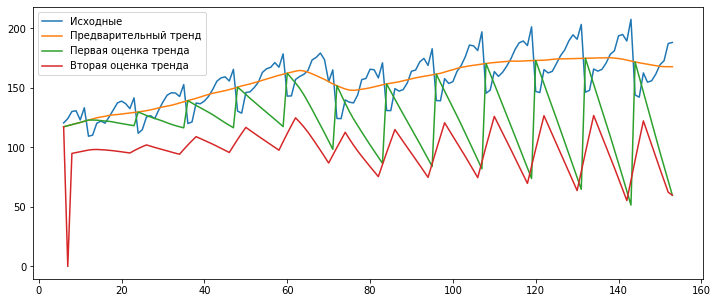

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(data['BBR_EA_M_I'], label='Исходные')
plt.plot(data['Y'], label='Предварительный тренд')
plt.plot(data['U1'], label='Первая оценка тренда')
plt.plot(data['U2'], label='Вторая оценка тренда')
plt.legend()

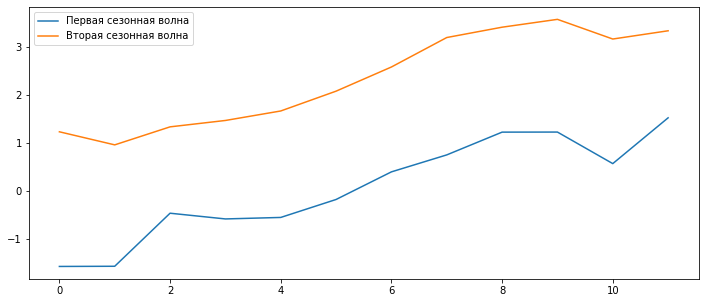

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(V1, label='Первая сезонная волна')
plt.plot(V2, label='Вторая сезонная волна')
plt.legend()

Text(0.5, 1.0, 'Остаточная компонента')

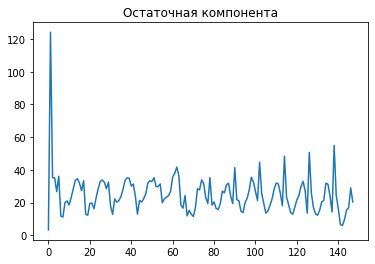

In [ ]:
plt.plot(e)
plt.title('Остаточная компонента')